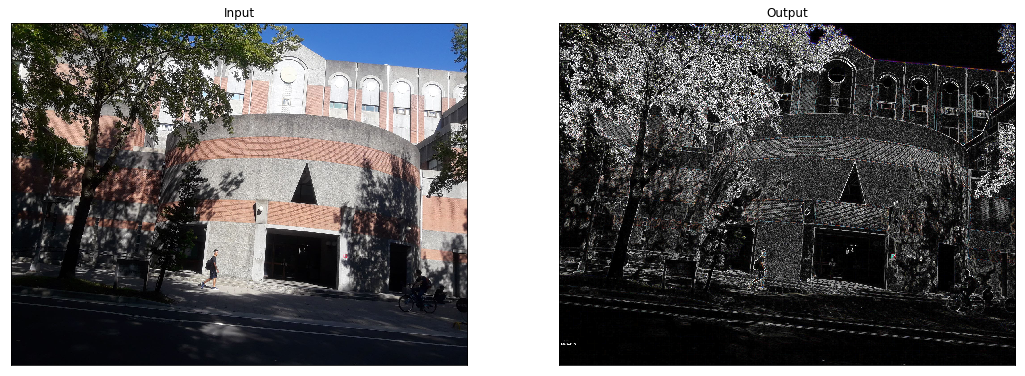

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import cv2


def sobel_edge_detect(img):
    sobelx = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3)  # x
    sobely = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3)  # y
    absX = cv2.convertScaleAbs(sobelx)   # 转回uint8
    absY = cv2.convertScaleAbs(sobely)
    return cv2.addWeighted(absX, 0.5, absY, 0.5, 0)


def add_text_to_img(img):
    height, width, channels = img.shape
    pil_img = Image.fromarray(img)
    font = ImageFont.truetype('/Library/Fonts/Arial.ttf', 12)
    draw = ImageDraw.Draw(pil_img)
    draw.text((10, height - 100), "R07944033", (255, 255, 255), font=font)
    return np.asarray(pil_img)


if __name__ == '__main__':
    # Question 1
    img = cv2.cvtColor(cv2.imread('input.jpg'), cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(18, 18))

    plt.subplot(121)
    plt.imshow(img)
    plt.title('Input'), plt.xticks([]), plt.yticks([])
    # Question 2
    dst = sobel_edge_detect(img)
    # Quesion 3
    dst = add_text_to_img(dst)
    plt.subplot(122)
    plt.imshow(dst, cmap='gray')
    plt.title('Output'), plt.xticks([]), plt.yticks([])
    plt.show()

    # Question 4
    Image.fromarray(dst).save("output.png")